## Data Cleaning, Handling Missing values

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk')

In [2]:
#reading csv file containing GRE verbal and quant score
df= pd.read_csv("GRE.csv")
display(df)
print(df.shape)

,Date,verbal_score,quant_score
0,09/01/2021,0.0,1.0
1,09/02/2021,1.0,2.0
2,09/03/2021,2.0,3.0
3,09/04/2021,3.0,NaN
4,09/05/2021,NaN,NaN
5,09/06/2021,NaN,NaN
6,09/07/2021,6.0,7.0
7,09/08/2021,7.0,8.0
8,09/09/2021,8.0,9.0
9,09/10/2021,9.0,10.0


(10, 3)


#### Checking for missing values

In [3]:
#method 1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          10 non-null     object 
 1   verbal_score  8 non-null      float64
 2   quant_score   7 non-null      float64
dtypes: float64(2), object(1)
memory usage: 368.0+ bytes


In [4]:
#method 2
display(df.isna())
display(df.isna().sum())


,Date,verbal_score,quant_score
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,True
4,False,True,True
5,False,True,True
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


Date            0
verbal_score    2
quant_score     3
dtype: int64

<b>Result</b><p> There are 2 verbal score and 3 quant score missing</p>

#### Converting string to datetime 

In [5]:
df['Date']=pd.to_datetime(df['Date'])
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          10 non-null     datetime64[ns]
 1   verbal_score  8 non-null      float64       
 2   quant_score   7 non-null      float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 368.0 bytes


None

#### Set index

In [6]:
df=df.set_index("Date")
display(df.head())
print(df.shape)

,verbal_score,quant_score
Date,,
2021-09-01,0.0,1.0
2021-09-02,1.0,2.0
2021-09-03,2.0,3.0
2021-09-04,3.0,NaN
2021-09-05,NaN,NaN


(10, 2)


### Drop all missing values

In [12]:
df_without_missing_vals = df.dropna()
#display(df_without_missing_vals)

In [8]:
df.loc['09-01-2021':"09-08-2021", ['verbal_score']]

,verbal_score
Date,
2021-09-01,0.0
2021-09-02,1.0
2021-09-03,2.0
2021-09-04,3.0
2021-09-05,NaN
2021-09-06,NaN
2021-09-07,6.0
2021-09-08,7.0


In [9]:
df.iloc[0:8,[1]]

,quant_score
Date,
2021-09-01,1.0
2021-09-02,2.0
2021-09-03,3.0
2021-09-04,NaN
2021-09-05,NaN
2021-09-06,NaN
2021-09-07,7.0
2021-09-08,8.0


In [10]:
#print(df.verbal_score)
#print(df['verbal_score'])

#### Removing missing values

In [14]:
df_drop_all_nan = df.dropna()
display(df_drop_all_nan)
print(df_drop_all_nan.info())

,verbal_score,quant_score
Date,,
2021-09-01,0.0,1.0
2021-09-02,1.0,2.0
2021-09-03,2.0,3.0
2021-09-07,6.0,7.0
2021-09-08,7.0,8.0
2021-09-09,8.0,9.0
2021-09-10,9.0,10.0


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7 entries, 2021-09-01 to 2021-09-10
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   verbal_score  7 non-null      float64
 1   quant_score   7 non-null      float64
dtypes: float64(2)
memory usage: 168.0 bytes
None


#### Replacing missing values by MEAN, MEDIAN, CONSTANT

In [22]:
df_replaced_by_mean = df.fillna(df.mean())
display(df_replaced_by_mean)
display(df_replaced_by_mean.info())

df_replaced_by_median = df.fillna(df.median())
#display(df_replaced_by_mean)
#display(df_replaced_by_mean.info())

df_replaced_by_constant = df.fillna(0)
#display(df_replaced_by_mean)
#display(df_replaced_by_mean.info())

,verbal_score,quant_score
Date,,
2021-09-01,0.0,1.000000
2021-09-02,1.0,2.000000
2021-09-03,2.0,3.000000
2021-09-04,3.0,5.714286
2021-09-05,4.5,5.714286
2021-09-06,4.5,5.714286
2021-09-07,6.0,7.000000
2021-09-08,7.0,8.000000
2021-09-09,8.0,9.000000


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10 entries, 2021-09-01 to 2021-09-10
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   verbal_score  10 non-null     float64
 1   quant_score   10 non-null     float64
dtypes: float64(2)
memory usage: 540.0 bytes


None

#### Replacing missing values by INTERPOLATION

In [18]:
df_interpolate = df.interpolate()

display(df_interpolate)

,verbal_score,quant_score
Date,,
2021-09-01,0.0,1.0
2021-09-02,1.0,2.0
2021-09-03,2.0,3.0
2021-09-04,3.0,4.0
2021-09-05,4.0,5.0
2021-09-06,5.0,6.0
2021-09-07,6.0,7.0
2021-09-08,7.0,8.0
2021-09-09,8.0,9.0


#### Replacing missing values by FORWARD IMPUTATION, BACKWARD IMPUTATION

In [21]:
df_forward = df.fillna(df.ffill())
display(df_forward)

df_backward = df.fillna(df.bfill())
display(df_backward)

,verbal_score,quant_score
Date,,
2021-09-01,0.0,1.0
2021-09-02,1.0,2.0
2021-09-03,2.0,3.0
2021-09-04,3.0,3.0
2021-09-05,3.0,3.0
2021-09-06,3.0,3.0
2021-09-07,6.0,7.0
2021-09-08,7.0,8.0
2021-09-09,8.0,9.0


,verbal_score,quant_score
Date,,
2021-09-01,0.0,1.0
2021-09-02,1.0,2.0
2021-09-03,2.0,3.0
2021-09-04,3.0,7.0
2021-09-05,6.0,7.0
2021-09-06,6.0,7.0
2021-09-07,6.0,7.0
2021-09-08,7.0,8.0
2021-09-09,8.0,9.0


### Create a Function for Plotting

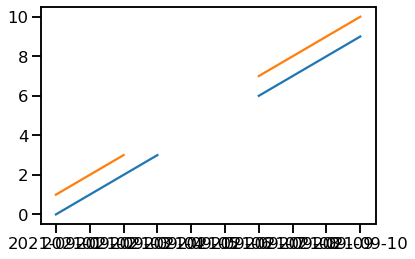

In [23]:
def time_series_plot(data, title):    
    plt.plot(data.index, data.verbal_score.values, label='verbal', marker='o')
    plt.plot(data.index, data.quant_score.values, label='quant', marker='o')

    plt.xticks(rotation=90)
    plt.ylabel("score")
    plt.legend()
    plt.title(title)